In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

consumption = pd.read_csv('../data/cleaned_data/clean_consumption.csv')



consumption.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,Angola,Robusta/Arabica,1200,1800,2100,1200,1500,600,1200,2400,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
1,Bolivia (Plurinational State of),Arabica,1500,1620,1680,1680,1800,1800,1920,1920,...,2880,2940,3000,3120,3240,3300,3420,3480,3600,3660
2,Brazil,Arabica/Robusta,492000,510000,534000,546000,558000,606000,660000,690000,...,1147920,1183200,1219800,1205100,1219980,1230480,1273500,1319820,1332000,1320000
3,Burundi,Arabica/Robusta,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
4,Ecuador,Arabica/Robusta,21000,21000,21000,21000,21000,21000,18000,18000,...,9000,9000,9000,9300,9300,9300,9300,9300,9300,8940


In [3]:
# adding a column for Total production    
consumption['Total_consumption'] = consumption.iloc[:, 2:33].sum(axis=1)

In [4]:
total_consumption = consumption[['Country', 'Total_consumption', 'Coffee type']].sort_values(by=['Total_consumption'],
                                                                                        ascending=False)
total_consumption.head(20)

,Country,Total_consumption,Coffee type
2,Brazil,27824700,Arabica/Robusta
5,Indonesia,4920480,Robusta/Arabica
29,Ethiopia,4536540,Arabica
41,Mexico,3189660,Arabica/Robusta
18,Philippines,2807280,Robusta/Arabica
23,Colombia,2536620,Arabica
52,Venezuela,2385900,Arabica
36,India,2093460,Robusta/Arabica
53,Viet Nam,1921020,Robusta/Arabica
48,Thailand,1248600,Robusta/Arabica


In [5]:
#looking for Top 5 producers
top5_consumption = consumption[['Country', 'Total_consumption', 'Coffee type']].sort_values(by=['Total_consumption'],
                                                                                        ascending=False).head(5)
top5_consumption

,Country,Total_consumption,Coffee type
2,Brazil,27824700,Arabica/Robusta
5,Indonesia,4920480,Robusta/Arabica
29,Ethiopia,4536540,Arabica
41,Mexico,3189660,Arabica/Robusta
18,Philippines,2807280,Robusta/Arabica


In [6]:
top5_consumption.dtypes

Country              object
Total_consumption     int64
Coffee type          object
dtype: object

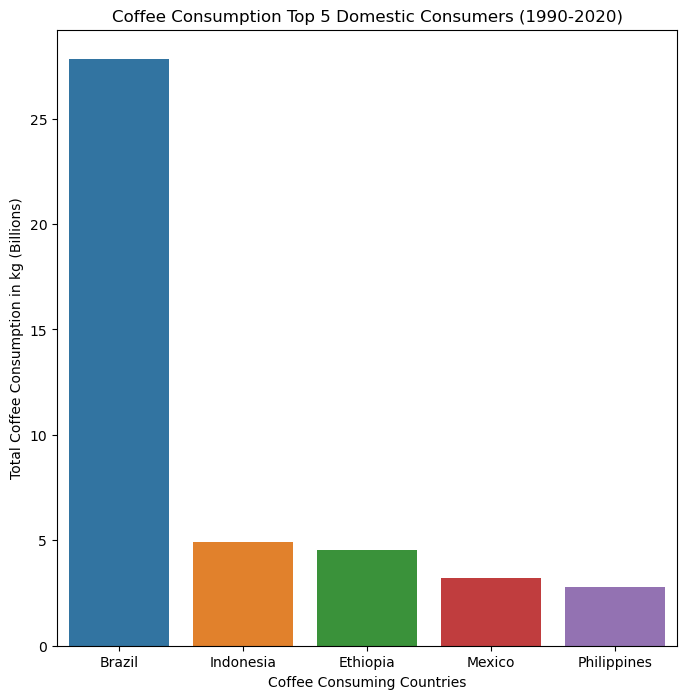

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Country",
           y=top5_consumption["Total_consumption"]/1000000 ,
           data=top5_consumption,
           errorbar=None,
#           hue="Coffee type"
           )
ax.set_ylabel("Total Coffee Consumption in kg (Billions)")
ax.set_xlabel("Coffee Consuming Countries")
ax.set_title("Coffee Consumption Top 5 Domestic Consumers (1990-2020)");

fig.savefig("../images/top5_consumption.png")

In [8]:
#Create df of production with only top 5 countries
consumption_time = consumption[consumption['Country'].isin(top5_consumption['Country'])]
#transpose df, making sure to sort values
consumption_time = consumption_time.sort_values(by=['Total_consumption'],ascending=False).T
#drop the non-numeric and totals rows
consumption_time.drop(['Country', 'Coffee type', 'Total_consumption'], axis=0, inplace=True)
# use top 5 country names
consumption_time.columns = top5_consumption['Country'].values
#set index name 
consumption_time.index.name = 'Year'
#reset the index
consumption_time.reset_index()
consumption_time

,Brazil,Indonesia,Ethiopia,Mexico,Philippines
Year,,,,,
1990/91,492000,74520,72000,82440,43200
1991/92,510000,76800,75840,72000,45000
1992/93,534000,79140,79860,78000,45000
1993/94,546000,81540,84120,64200,46200
1994/95,558000,84000,88560,61200,47400
1995/96,606000,86580,93300,70740,48600
1996/97,660000,89160,98220,74100,49860
1997/98,690000,91920,103440,72060,51180
1998/99,732000,94680,108960,66480,48600


In [9]:
consumption_time["Mexico"].sum()

3189660

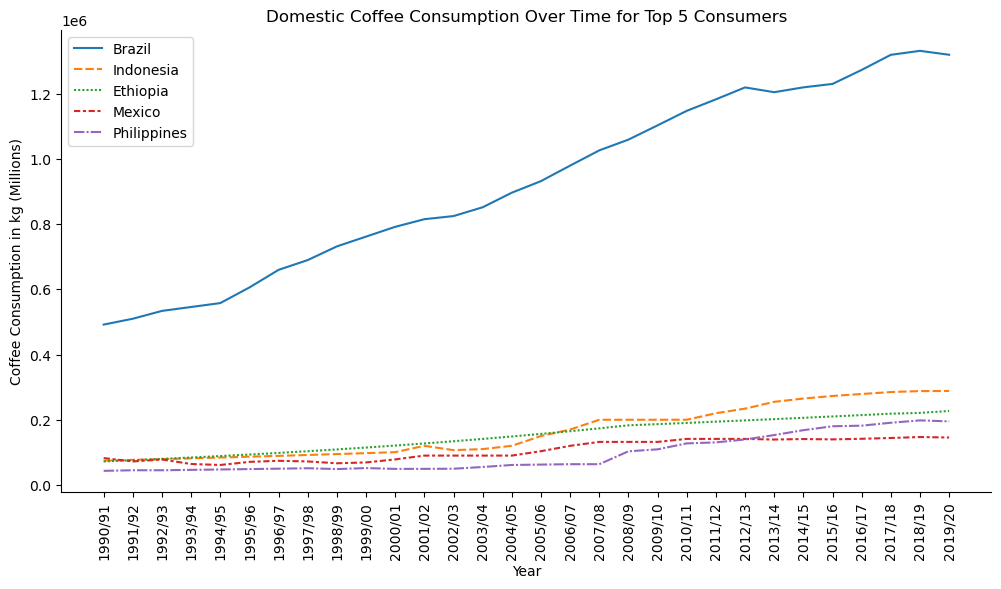

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=consumption_time,
            )
ax.set_title("Domestic Coffee Consumption Over Time for Top 5 Consumers")
ax.set_ylabel("Coffee Consumption in kg (Millions)")
ax.xaxis.set_tick_params(rotation=90)
sns.despine();

fig.savefig("../images/top5_consumers_over_time.png")